In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
def read_player_events(experiment, generation, player):
    filename = f"stats/{experiment}/generations/gen_{generation}/player_{player}_stats.json"
    file1 = open(filename, "r")
    Lines = file1.readlines()

    player_events = []
    for line in Lines:
        try:
            record = json.loads(line)
            for e in record: player_events.append(e)
        except: pass
    return player_events

In [9]:
avg_one_agent_involved = []
avg_two_agent_involved = []
avg_rewards = []
avg_selfish = []
avg_collaborative = []
generations = 50
players = 5

# Collect for each generation
for gen in range(1, generations):
    
    one_agent_involved = []
    two_agent_involved = []
    rewards = []
    selfish = []
    collaborative = []
    
    # Average stats over all players
    for player in range(players):
        player_events = read_player_events("exp1_16_04_23", gen, player)

        # Number of agents involved
        agents_involved = np.array([e["agents_involved"] for e in player_events])
        one_agent_involved.append(np.where(agents_involved == 1)[0].shape[0])
        two_agent_involved.append(np.where(agents_involved == 2)[0].shape[0])

        # Reward
        reward = np.array([e["reward"] for e in player_events])
        rewards.append(np.mean(reward))

        # Particular events
        above_level_selfish = np.array(
            [((e["agent_level"] >= e["food_level"]) and (e["agents_involved"] == 1)) for e in player_events]
        )
        above_level_collaborative = np.array(
            [((e["agent_level"] >= e["food_level"]) and (e["agents_involved"] > 1)) for e in player_events]
        )
        selfish.append(np.where(above_level_selfish == True)[0].shape[0])
        collaborative.append(np.where(above_level_collaborative == True)[0].shape[0])
    
    avg_one_agent_involved.append(np.mean(one_agent_involved))
    avg_two_agent_involved.append(np.mean(two_agent_involved))
    avg_rewards.append(np.mean(rewards))
    avg_selfish.append(np.mean(selfish))
    avg_collaborative.append(np.mean(collaborative))

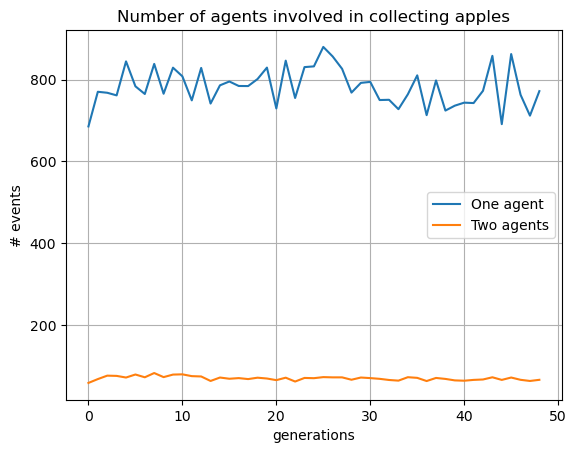

In [10]:
plt.title("Number of agents involved in collecting apples")
plt.xlabel("generations")
plt.ylabel("# events")
plt.plot(avg_one_agent_involved, label="One agent")
plt.plot(avg_two_agent_involved, label="Two agents")
plt.legend()
plt.grid()

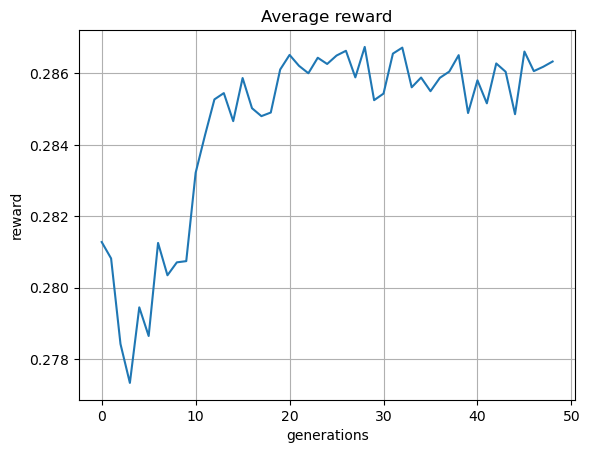

In [11]:
plt.title("Average reward")
plt.xlabel("generations")
plt.ylabel("reward")
plt.plot(avg_rewards, label="Avg. reward")
plt.grid()